<a href="https://colab.research.google.com/github/andree41/andree41.github.io/blob/main/1820212030_Eng_Jie_Spark_MLlib_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=a31f1c544418cef3379506234259efb06fc073eb452c2a2b9cd5404415f43300
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = """--name job_name --master local --conf spark.dynamicAllocation.enabled=true pyspark-shell"""

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt

k-means algorithm for clustering experiment

In [ ]:
# Load the clustering dataset
iris_df = spark.read.csv("/content/iris_dataset.csv", header=True, inferSchema=True)

In [ ]:
# Prepare the data by assembling features into a vector
feature_columns = iris_df.columns[:-1]
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = vector_assembler.transform(iris_df)

In [ ]:
# Create and train the K-Means clustering model
kmeans = KMeans(featuresCol="features", predictionCol="cluster", k=3)
kmeans_model = kmeans.fit(data)

In [ ]:
# Assign cluster labels to data points
clustered_data = kmeans_model.transform(data)

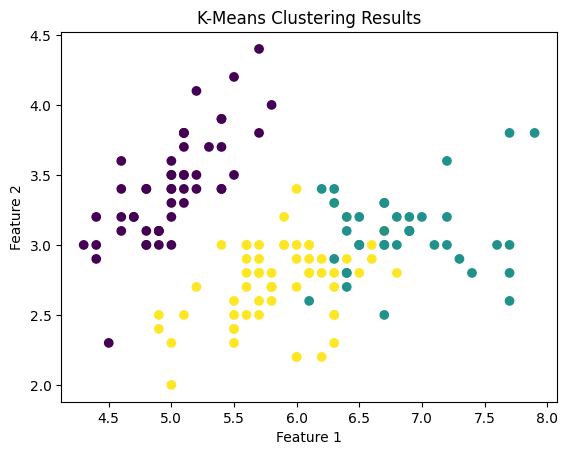

In [ ]:
# Visualize the results (for example, a scatter plot)
pandas_df = clustered_data.select("features", "cluster").toPandas()
plt.scatter(pandas_df["features"].apply(lambda x: x[0]), pandas_df["features"].apply(lambda x: x[1]), c=pandas_df["cluster"])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Results")
plt.show()

linear regression algorithm for regression experiment

In [ ]:
# Initialize a Spark session
spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

In [ ]:
# Load the linear regression dataset
linear_reg_df = spark.read.csv("/content/linear_reg.csv", header=True, inferSchema=True)

In [ ]:
# Define 'sepal_length' as the dependent variable
dependent_variable = "var1"

In [ ]:
# Prepare the data by assembling features into a vector
feature_columns = [col for col in linear_reg_df.columns if col != dependent_variable]
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = vector_assembler.transform(linear_reg_df)

In [ ]:
# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3])

In [ ]:
# Create and train the linear regression model
lr = LinearRegression(featuresCol="features", labelCol=dependent_variable)
lr_model = lr.fit(train_data)

In [ ]:
# Make predictions on the test data
predictions = lr_model.transform(test_data)

In [ ]:
# Evaluate the regression model
evaluator = RegressionEvaluator(labelCol=dependent_variable, predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.839822018719995e-12


In [ ]:
# Show the first 5 rows of the prediction result
predictions.select("features", "prediction").show(5)

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[460.0,509.0,66.0...| 459.9999999999881|
|[464.0,640.0,66.0...| 463.9999999999936|
|[466.0,646.0,51.0...|465.99999999999255|
|[495.0,651.0,50.0...| 494.9999999999943|
|[496.0,615.0,66.0...|495.99999999999426|
+--------------------+------------------+
only showing top 5 rows

